# Machine Learning - Decision Tree With Pokemon

## Import Libraries

In [1]:
## Begin Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
## End Imports

## Pokemon Dataset

<center><img src="../images/web/pokemon.webp"></center>

### Load Dataset

In [2]:
### Load Pokemon CSV
file = "../data/pokemon.csv"

pokemon = pd.read_csv(file, index_col=0)

### View Info

In [3]:
### View Info
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


### Cleaning Data

In [4]:
## Fill Null Values with "None"
pokemon_clean = pokemon.copy()

pokemon_clean = pokemon_clean.fillna("None")

pokemon_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


### Preview First Few Rows

In [5]:
### Preview First Few Rows
pokemon_clean.head(10)



,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


### Visualize Distribution of Data

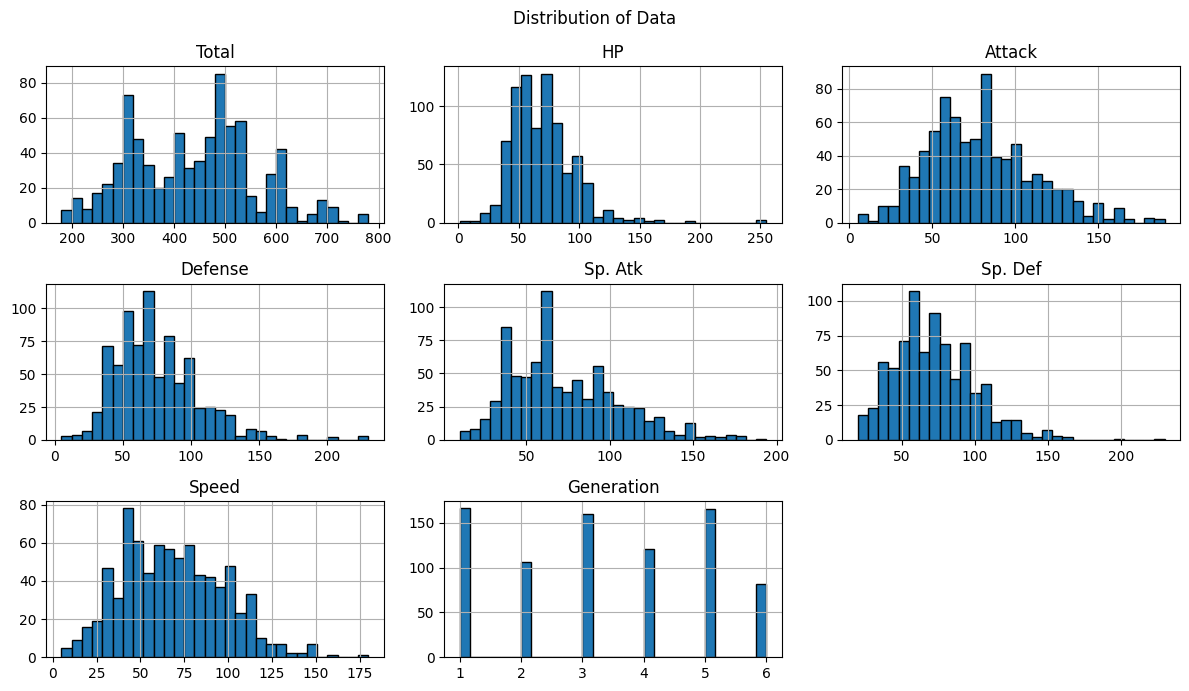

In [6]:
### Distribution of Data
pokemon_clean.hist(figsize=(12,7),
             bins=30,
             edgecolor="black")

plt.subplots_adjust(hspace=0.7,
                    wspace=0.4)
plt.suptitle("Distribution of Data")
plt.tight_layout()

### Visualize Pokemon Type Count

#### Get Value Counts

__Syntax__:
```python
counts = dataframe[column_name].value_counts()
```

In [7]:
### Output Unique Types
pokemon_type_count = pokemon_clean["Type 1"].value_counts()

pokemon_type_count

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

#### Visualize Types as Bar Plot

__Syntax__:
```python
sns.barplot(x=x_value, y=y_value)
```

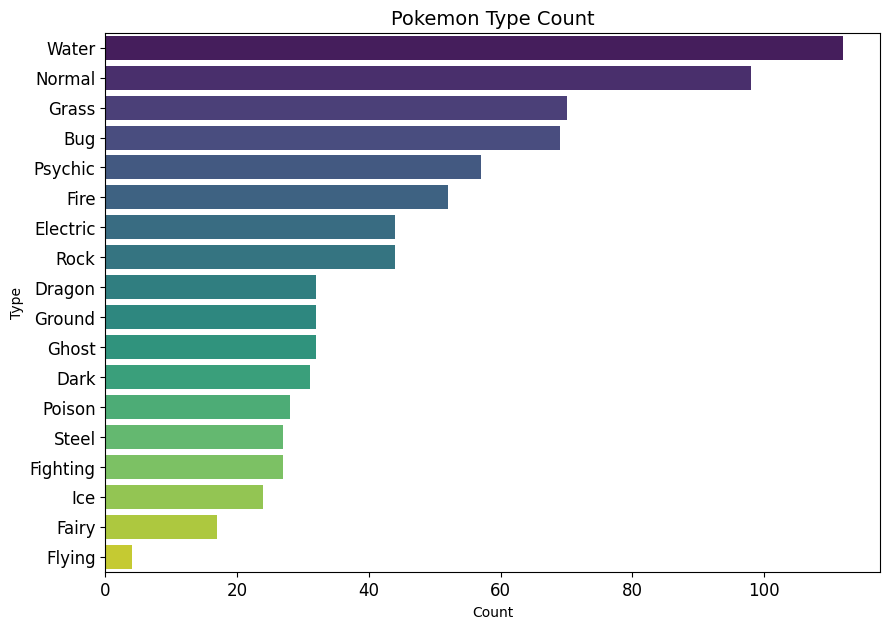

In [8]:
# Bar Plot
plt.figure(figsize=(10,7))

sns.barplot(x=pokemon_type_count.values, 
            y=pokemon_type_count.index, 
            palette='viridis', 
            hue=pokemon_type_count.index)

plt.title("Pokemon Type Count", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Type")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Prepare the Data

#### Define Features (`X`) and Target (`y`)

In [9]:
# Define Features and Target
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Legendary', 'Generation']
target = 'Type 1'

X = pokemon_clean[features]
y = pokemon_clean[target]

### Split up the Data

```python
train_test_split(X_data, y_data, test_size=split_value, random_state=seed_value)
```

In [10]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

### View X_train Info

In [11]:
# X_train Info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 245 to 94
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HP          640 non-null    int64
 1   Attack      640 non-null    int64
 2   Defense     640 non-null    int64
 3   Sp. Atk     640 non-null    int64
 4   Sp. Def     640 non-null    int64
 5   Speed       640 non-null    int64
 6   Total       640 non-null    int64
 7   Legendary   640 non-null    bool 
 8   Generation  640 non-null    int64
dtypes: bool(1), int64(8)
memory usage: 45.6 KB


### View y_train Info

In [12]:
# y_train Info
y_train.info()

<class 'pandas.core.series.Series'>
Index: 640 entries, 245 to 94
Series name: Type 1
Non-Null Count  Dtype 
--------------  ----- 
640 non-null    object
dtypes: object(1)
memory usage: 10.0+ KB


# Build Model - Decision Tree

### Build Model

```python
model = ModelType()
```

In [13]:
## Import and Build Decision Tree
clf = DecisionTreeClassifier(
    random_state=42
)

### Train Model

__Syntax__:
```python
model.fit(x_training_data, y_training_data)
```

In [14]:
## Train Model
clf.fit(
    X_train,
    y_train
)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Get Predictions

__Syntax:__
```python
predictions = clf.predict(test_data)
```

In [15]:
## Get Predictions

predictions = clf.predict(X_test)

### View Predictions vs Actual Data

In [16]:
### Create DataFrame of Predictions
prediction_dictionary = {
    "Actual Type": y_test,
    "Predicted Type": predictions
}

prediction_results = pd.DataFrame(prediction_dictionary)

prediction_results.head(20)

,Actual Type,Predicted Type
#,,
635,Dark,Dragon
606,Psychic,Electric
58,Fire,Grass
479,Electric,Electric
61,Water,Normal
560,Dark,Poison
317,Poison,Grass
442,Ghost,Grass
690,Poison,Water


### Evaluate Model

### Classification Report

Syntax:

```python
classification_report(Y_TEST, Y_PREDICTIONS)
```

In [17]:
### Classification Report Results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         Bug       0.08      0.11      0.10         9
        Dark       0.11      0.14      0.12         7
      Dragon       0.12      0.25      0.17         4
    Electric       0.38      0.50      0.43        10
       Fairy       0.00      0.00      0.00         3
    Fighting       0.00      0.00      0.00         3
        Fire       0.00      0.00      0.00         7
      Flying       0.00      0.00      0.00         0
       Ghost       0.50      0.10      0.17        10
       Grass       0.14      0.17      0.15        18
      Ground       0.17      0.12      0.14         8
         Ice       0.00      0.00      0.00         3
      Normal       0.16      0.20      0.18        15
      Poison       0.00      0.00      0.00         8
     Psychic       0.40      0.25      0.31        16
        Rock       0.50      0.27      0.35        11
       Steel       0.17      0.25      0.20         4
       Water       0.22    

/opt/cat/jupyterhub.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/cat/jupyterhub.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/cat/jupyterhub.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/op

### Improve the Data

Focus on predicting one Pokémon type.

Create a new column called `Is_Electric` which contains `True` if the Pokémon is Electric and `False` is the Pokémon is not electric.

In [18]:
## Improve the Data - Electric vs Non-Electric
pokemon_clean['Is_Electric'] = pokemon_clean["Type 1"] == "Electric"

pokemon_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         800 non-null    object
 1   Type 1       800 non-null    object
 2   Type 2       800 non-null    object
 3   Total        800 non-null    int64 
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Atk      800 non-null    int64 
 8   Sp. Def      800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
 12  Is_Electric  800 non-null    bool  
dtypes: bool(2), int64(8), object(3)
memory usage: 76.6+ KB


### Inspect Data

Get the Value Counts of the new columns.

In [19]:
# Value Counts
pokemon_clean["Is_Electric"].value_counts()

Is_Electric
False    756
True      44
Name: count, dtype: int64

### Set Up Features and Target

In [20]:
# Set Up Features and Target Again
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Legendary', 'Generation']
target = 'Is_Electric'

X = pokemon_clean[features]
y = pokemon_clean[target]

### Set Up Training Data

In [21]:
# Set Up Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Set Up and Train Model

In [22]:
# Set Up Model
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=3
)


# Train Model
clf.fit(
    X_train, 
    y_train
)

# Get Predictions
predictions = clf.predict(X_test)


### Compare Actual Values vs Predicted Values

In [23]:
# Compare Predictions and Actual Values
predictionary = {
    "Actual Values": y_test,
    "Predicted Values": predictions
}

updated_prediction_results = pd.DataFrame(predictionary)

updated_prediction_results.head(20)

,Actual Values,Predicted Values
#,,
635,False,False
606,False,False
58,False,False
479,True,False
61,False,False
560,False,False
317,False,False
442,False,False
690,False,False


### Model Evaluation

In [24]:
### Classification Report Results
print(classification_report(y_test, predictions, zero_division=0))




              precision    recall  f1-score   support

       False       0.94      1.00      0.97       150
        True       0.00      0.00      0.00        10

    accuracy                           0.94       160
   macro avg       0.47      0.50      0.48       160
weighted avg       0.88      0.94      0.91       160



### Visualizing the Tree

Text(0.5, 1.0, 'Decision Tree')

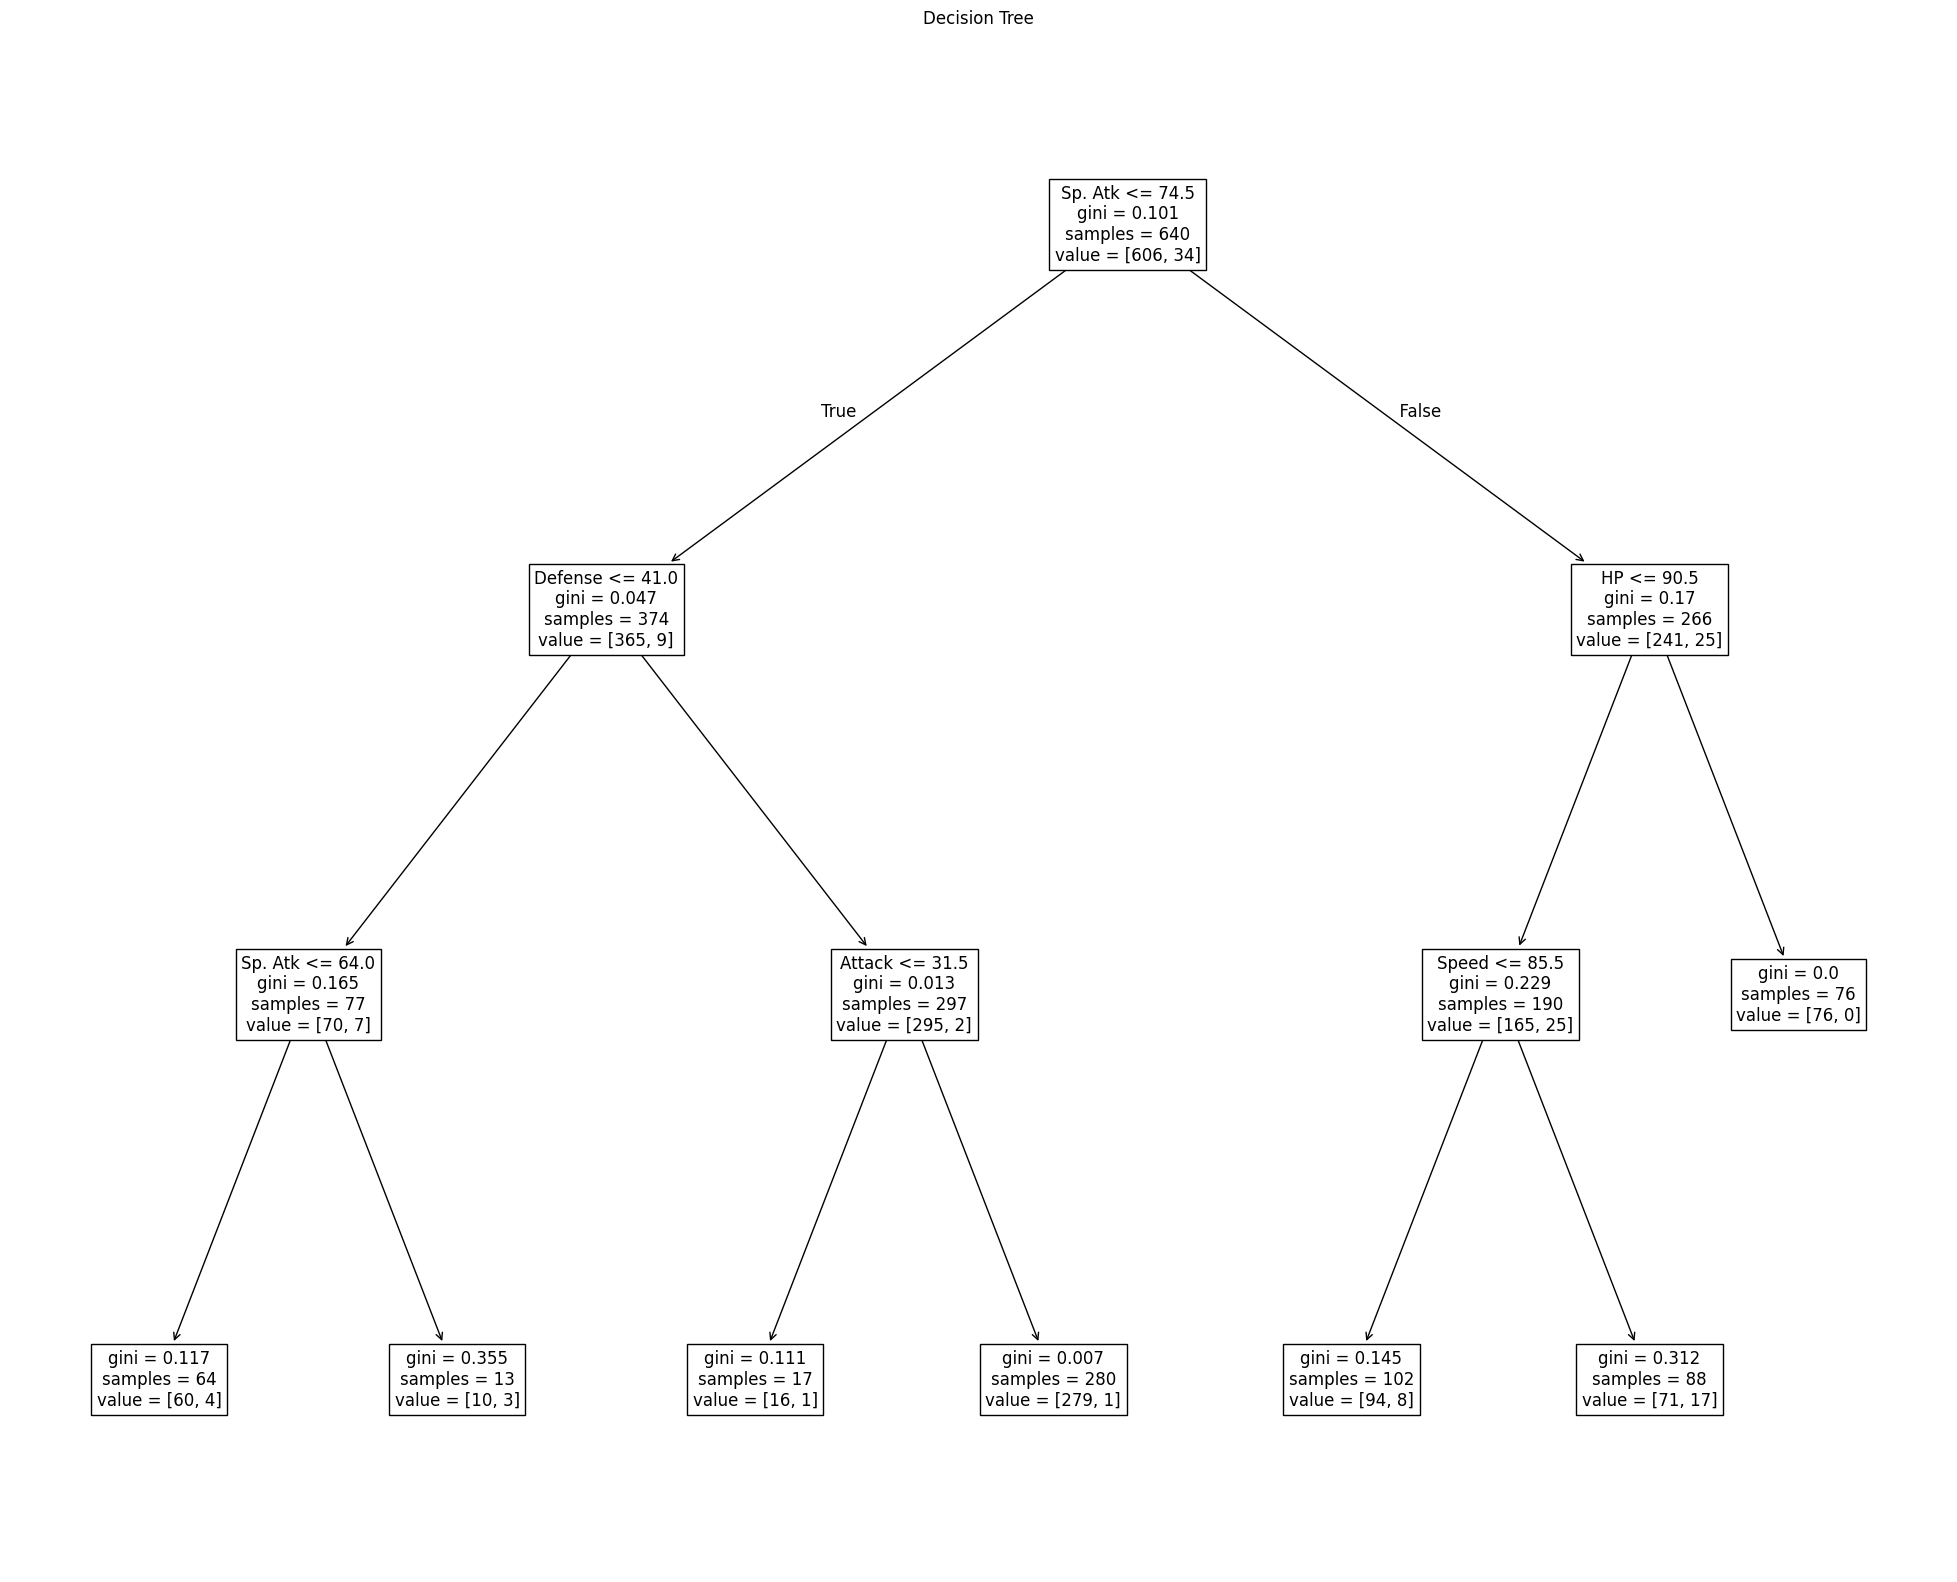

In [25]:
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(clf,
              feature_names=features,
               fontsize=12)

plt.title("Decision Tree")